In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
import os
from utils import load_image, show_custom_channels, show_with_cmap, zoom_in, \
                  add_noise, simple_denoise, blur, simple_deblur, \
                  detect_cell_boundary
%matplotlib inline

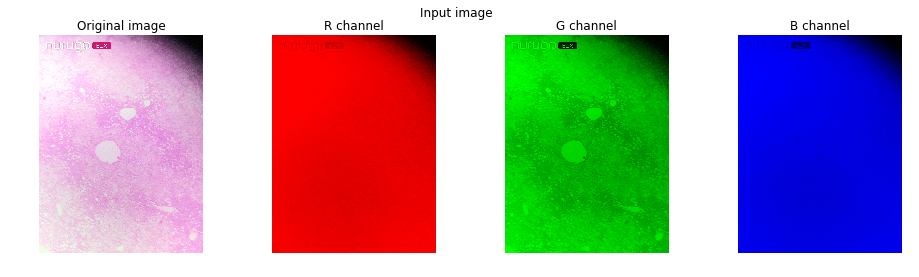

In [2]:
# Load one of these sample image, show different color channels.
img = load_image(os.path.join('samples', 'IMG_6566.JPG'))
show_custom_channels(img, color_space='rgb', title='Input image')

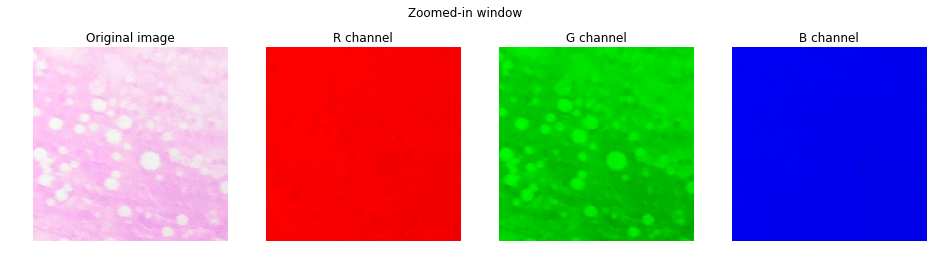

In [3]:
# Zoom in and show a small window to see triplet of color values for a
# 64x64 (or so) window
zoomed = zoom_in(img, 850, 950, height=500, width=500)
show_custom_channels(zoomed, color_space='rgb', title='Zoomed-in window')

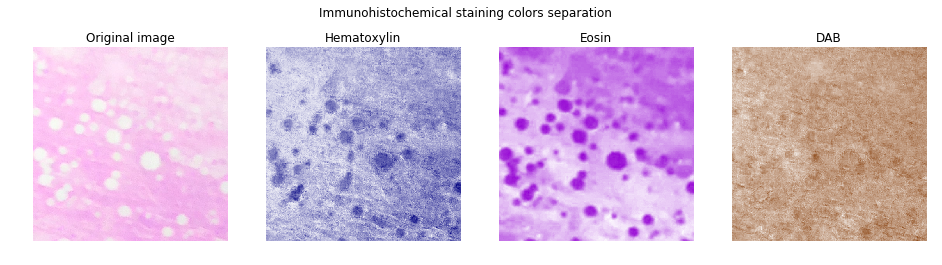

In [4]:
# Separate H&E color stain channels from the image
channel_lst, cmap_lst = show_custom_channels(
    zoomed, color_space='hed', title='Immunohistochemical staining colors separation')
sel_chn = np.copy(channel_lst[1])  # select eosin channel for processing
sel_cmap = cmap_lst[1]

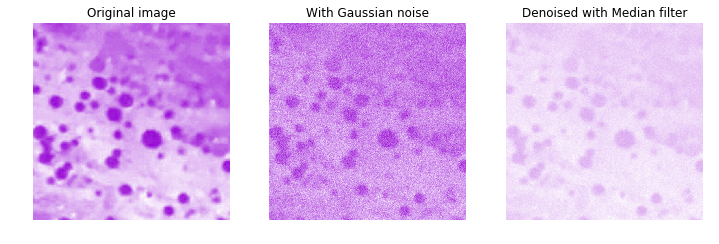

In [5]:
# Add noise and do a simple denoising task
noised = add_noise(sel_chn)
denoised = simple_denoise(noised, kernel_size=3)
show_with_cmap([sel_chn, noised, denoised], [sel_cmap]*3,
               ['Original image', 'With Gaussian noise',
                'Denoised with Median filter'])

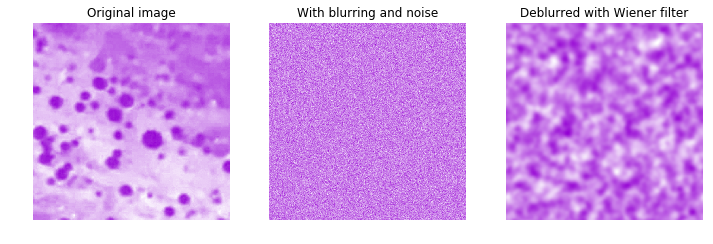

In [6]:
# Apply blurring and add noise and do a simple deblurring task, using the
# Wiener filter
blurred_noised = add_noise(blur(sel_chn, block_size=3), sigma=3)
deblurred = simple_deblur(blurred_noised)
show_with_cmap([sel_chn, blurred_noised, deblurred], [sel_cmap]*3,
               ['Original image', 'With blurring and noise',
                'Deblurred with Wiener filter'])

Average cell size:
  - Laplacian of Gaussian: 0.000
  - Difference of Gaussian: 2453.225
  - Determinant of Hessian: 0.000


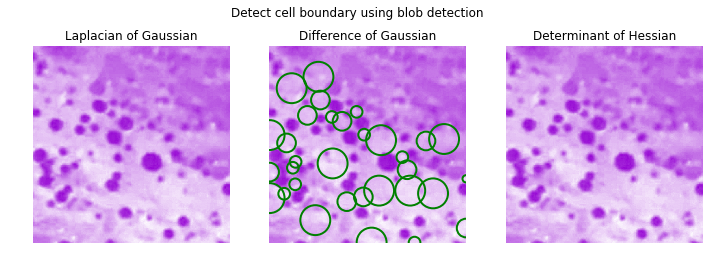

In [7]:
# Detect cell boundary and overlay the results on images
detect_cell_boundary(sel_chn, sel_cmap)